# From Scratch: Linear Regression (General)

I implemented linear regression to allow for $n$ features from scratch. Essentially, this is equivalent to finding the equation of the optimized hyperplane for some given collection of $m$ points in $n$-dimensional space.

### 1 / Import Libraries

We only need numpy (for matrix calculations) and matplotlib (for visualizations).

In [71]:
%matplotlib ipympl
import numpy as np
import pandas as pd # Optional for real-world data
import matplotlib.pyplot as plt

### 2 / Generating sample data

I randomly sampled 100 data points for $y=30x_1 + 200x_2 + 4$ with some noise.

X shape: (100, 2)
y shape: (100, 1)


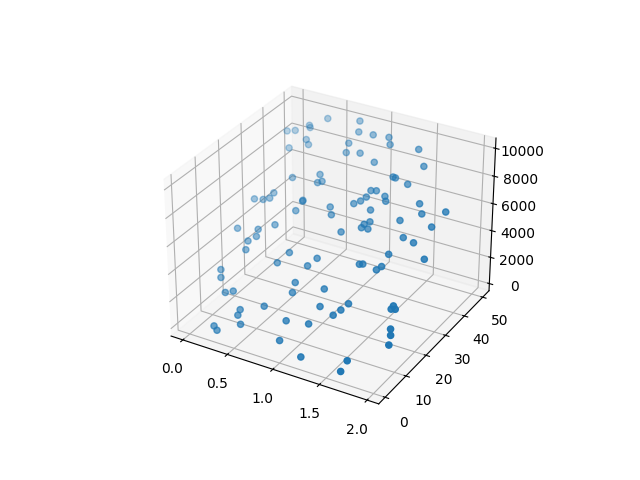

In [72]:
np.random.seed(0) # fixed so that results are replicable
sample_size = 100

X1 = 2 * np.random.rand(sample_size,1)
X2 = 50 * np.random.rand(sample_size,1)
X = np.c_[X1, X2]
y = 4 + 30 * X1 + 200 * X2 + np.random.randn(sample_size,1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y)
plt.show()

### 3 / Pre-processing

To avoid slow convergence, we scale the features (z-score scaling). 

In [73]:
def normalize(mat):
    means = np.array([np.mean(col) for col in mat.T])
    stds = np.array([np.std(col) for col in mat.T])
    mat = (mat - means)/stds

    return mat, means, stds

# Feature scaling
X_normalized, X_means, X_stds = normalize(X)
# Bias column
Xb = np.c_[np.ones(X.shape[0]), X_normalized]
print(f"Feature matrix shape: {Xb.shape}")
print(Xb[:5])

Feature matrix shape: (100, 3)
[[ 1.          0.26368103  0.54112729]
 [ 1.          0.84077065 -0.93265417]
 [ 1.          0.45081101  0.74848408]
 [ 1.          0.25004836  1.56882076]
 [ 1.         -0.17044317 -1.00946711]]


### 4 / Regression (Gradient Descent)

Hypothesis: $h_\theta(x) = X_b \cdot \theta$ where $X_b$ denotes the feature matrix X with appended constant column, and $\theta$ denotes the coefficients of regression.

Here, I performed [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) with mean-squared error as the loss function:

$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

The parameters $\theta$ is updated as:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \frac{\partial J}{\partial \theta_0} = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \frac{\partial J}{\partial \theta_1} = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]x^{(i)}$

In matrix notation, this becomes:

$\theta := \theta - \alpha \frac{1}{m} (X_b^{T} \cdot \text{error})$ where $\text{error}$ is the column matrix of all $h_\theta(x^{(i)})-y^{(i)}$.

In [74]:
# Hyperparameters
alpha = 0.01
iterations = 1000
theta = np.array([[1] for col in Xb.T])

print(f"Learning rate (alpha): {alpha}")
print(f"Gradient descent iterations: {iterations}")
print(f"Regression parameter (theta) shape: {theta.shape}")

m = Xb.shape[0]
theta100 = 0
theta500 = 0
for iter in range(iterations):
    predictions = Xb.dot(theta) 
    error = predictions - y 
    gradient = 1/m * Xb.T.dot(error) 
    theta = theta - alpha * gradient

    # print(f"Iter. {iter+1}: {np.sum(error)}")
    if (iter==100-1):
        theta100 = theta
    if (iter==500-1):
        theta500 = theta

Learning rate (alpha): 0.01
Gradient descent iterations: 1000
Regression parameter (theta) shape: (3, 1)


We visualize the regression by first scaling the X1 and X2 axes before prediction and plotting.

----------------------------------
Final parameters:[[5312.86566202]
 [  17.05242068]
 [2766.87065479]]
Final absolute mean error:0.2316462294507099


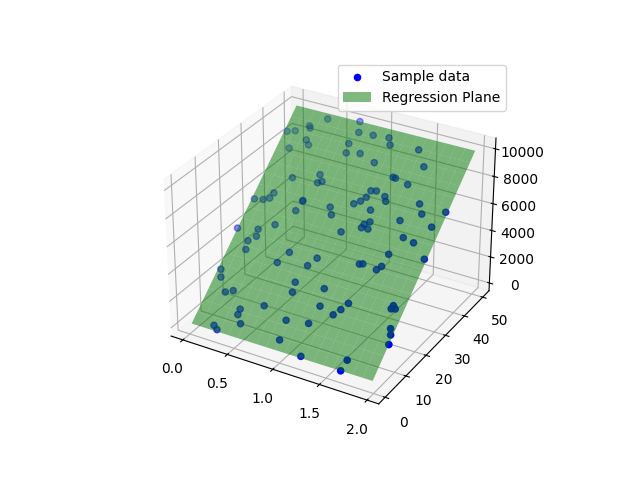

In [75]:
print(f"----------------------------------")
print(f"Final parameters:{theta}")
print(f"Final absolute mean error:{abs(np.sum(error)/m)}")
final_predictions = Xb.dot(theta)



final_fig = plt.figure()
ax1 = final_fig.add_subplot(111, projection='3d')
# Original data points
ax1.scatter(X1, X2, y, color='blue', label='Sample data')

# Plot regression
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid_x1_scaled = (xx1 - X_means[0]) / X_stds[0]
grid_x2_scaled = (xx2 - X_means[1]) / X_stds[1]
grid_features = np.c_[np.ones(xx1.ravel().shape), grid_x1_scaled.ravel(), grid_x2_scaled.ravel()]
final_predictions = grid_features.dot(theta)
Z = final_predictions.reshape(xx1.shape)
ax1.plot_surface(xx1, xx2, Z, alpha=0.5, color='green', label='Regression Plane')
plt.legend()
plt.show()